# **Old Cars Price Prediction**

First, Let's upload the data.

In [1]:
from google.colab import files
uploaded=files.upload()

Saving Data_Train.xlsx to Data_Train.xlsx


Importing the neccessary libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Reading the dataset into the dataframe **train**

In [3]:
train=pd.read_excel('Data_Train.xlsx')

Printing the first few and last few values of the dataframe.

In [4]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
train.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


Let's see what are the columns present in the dataframe.

In [6]:
train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

Let's check the number of rows and columns in the dataframe.

In [7]:
train.shape

(6019, 13)

So, the dataframe **train** has 6019 rows and 13 columns.

Now, Let's divide the dataframe into two dataframes :  
**numF** - containing all the numerical features  
**catF** - containing all the categorial features

In [8]:
numF=train.select_dtypes(include=[np.number])
numF.head()

,Year,Kilometers_Driven,Seats,Price
0,2010,72000,5.0,1.75
1,2015,41000,5.0,12.50
2,2011,46000,5.0,4.50
3,2012,87000,7.0,6.00
4,2013,40670,5.0,17.74


In [9]:
catF=train.select_dtypes(include=[np.object])
catF.head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,NaN
2,Honda Jazz V,Chennai,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,NaN


### Categorial Data Analysis

Now, First we'll analyse the categorial data. 
In the categorial dataframe, first let's analyse Name.

Since the **Name** of the car would not help in estimating the price but the **Company name** would.
So, we'll extract the company name from the name of the car.

In [10]:
train['Name'].unique().size

1876

So, there are 1876 unique names in the dataframe.

Now, we'll split the **Name** column into sub-strings and pick the first substring as the name of the company since all car names start with their company names.

In [11]:
t=train['Name'].str.split()
compName=t.str[0]
train['Comp_Name']=pd.Series(compName)
#train.insert(column='Comp_Name',value=compName,loc=1)
train.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Comp_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi


Let's check whether we have got all the names correct.

In [12]:
catF.insert(column='Comp_Name',value=compName,loc=1)
catF['Comp_Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

Observations:

1. We don't know company names like **Land**, **Force** and **Mini**.
2. Company names like **Isuzu** appear twice.

So, Let's fix that.

In [13]:
cn=catF['Comp_Name'].values
cn

array(['Maruti', 'Hyundai', 'Honda', ..., 'Mahindra', 'Maruti',
       'Chevrolet'], dtype=object)

In [14]:
train.loc[train['Comp_Name']=='Land']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Comp_Name
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,Land
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,Land
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,Land
311,Land Rover Range Rover HSE Dynamic,Delhi,2017,44000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,44.00,Land
399,Land Rover Range Rover 2.2L Dynamic,Hyderabad,2012,56000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,30.00,Land
404,Land Rover Range Rover 2.2L Prestige,Coimbatore,2017,34990,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,53.83,Land
410,Land Rover Range Rover 2.2L Pure,Coimbatore,2014,95649,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,29.67,Land
480,Land Rover Range Rover Evoque 2.0 TD4 Pure,Delhi,2015,24000,Diesel,Automatic,Second,15.68 kmpl,1999 CC,177 bhp,5.0,NaN,33.50,Land
521,Land Rover Range Rover HSE Dynamic,Coimbatore,2017,49275,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,45.64,Land
701,Land Rover Freelander 2 SE,Chennai,2011,109000,Diesel,Automatic,First,12.39 kmpl,2179 CC,147.51 bhp,5.0,NaN,16.50,Land


In [15]:
for i in range(train.shape[0]):
  if (cn[i]=='Land'):
    cn[i]='Land Rover'
  if (cn[i]=='ISUZU'):
    cn[i]='Isuzu'
  if (cn[i]=='Mini'):
    cn[i]='Mini Cooper'
  if (cn[i]=='Force'):
    cn[i]='Force One LX'

In [16]:
train=train.drop('Comp_Name',axis=1)
catF=catF.drop('Comp_Name',axis=1)

In [17]:
train.insert(column='Comp_Name',value=cn,loc=1)
catF.insert(column='Comp_Name',value=cn,loc=1)

Now that we have extracted the Company names , let's analyse it.

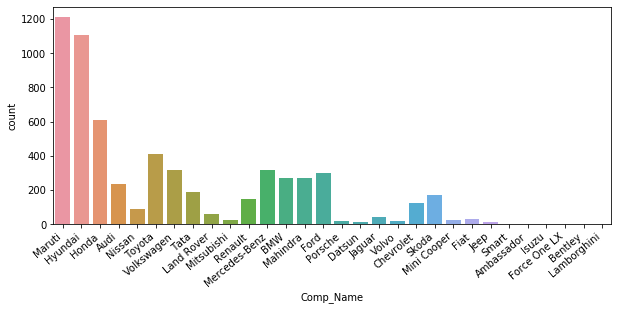

In [18]:
plt.figure(figsize=(10,4))
a=sns.countplot('Comp_Name',data=train)
a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
plt.show()

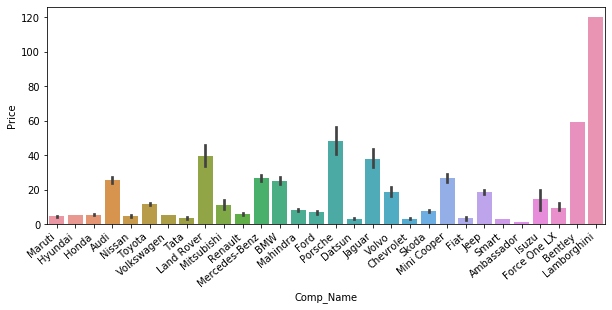

In [19]:
plt.figure(figsize=(10,4))
b=sns.barplot(x='Comp_Name',y='Price',data=train)
b.set_xticklabels(b.get_xticklabels(),rotation=40,ha='right')
plt.show()

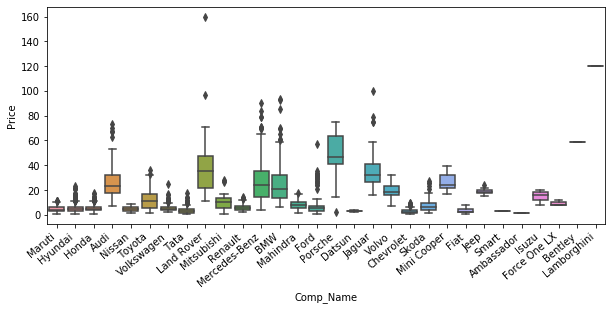

In [20]:
plt.figure(figsize=(10,4))
b=sns.boxplot('Comp_Name','Price',data=train)
b.set_xticklabels(b.get_xticklabels(),rotation=40,ha='right')
plt.show()

Observations from above three plots:
1. Companies like **Maruti** and **Hyundai** produce a large amount of cars with prices on the cheaper side (mostly under 10 lakhs).
2. Companies like **Bentley** and **Lamborghini** produce very few amount of cars but the prices are very high (approx 1.2 cr for Lamborghini and 60 lakhs for Bentley).
3. Other companies like **Land Rover**, **Jaguar** and **Porsche** produce more cars compared to Lamborghini and Bentley but the prices remain high (for Land Rover as high as 1.6 cr , for Jaguar upto 1 cr and for Porsche upto 80 lakhs)

Now, Let's analyse Locations.

<function matplotlib.pyplot.show(*args, **kw)>

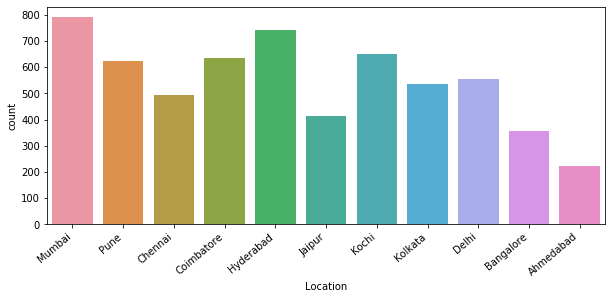

In [21]:
plt.figure(figsize=(10,4))
a=sns.countplot('Location',data=train)
a.set_xticklabels(a.get_xticklabels(),rotation=40,ha='right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

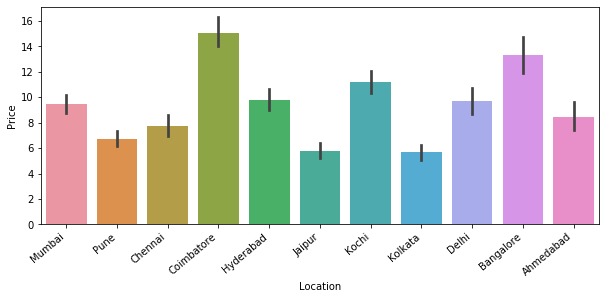

In [22]:
plt.figure(figsize=(10,4))
a=sns.barplot('Location','Price',data=train)
a.set_xticklabels(a.get_xticklabels(),rotation=40,ha='right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

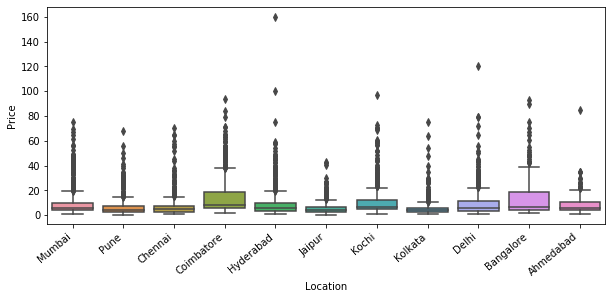

In [23]:
plt.figure(figsize=(10,4))
a=sns.boxplot('Location','Price',data=train)
a.set_xticklabels(a.get_xticklabels(),rotation=40,ha='right')
plt.show

Observations:
1. Hyderabad and Mumbai produce the most amount of cars.
2. Coimbatore and Banglore have the most expensive cars whereas Jaipur and Kolkata have the cheapest ones.

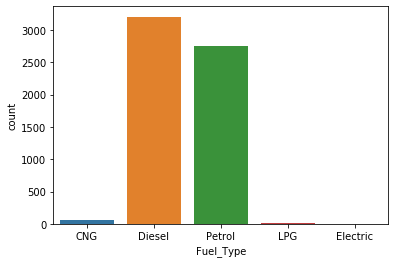

In [24]:
sns.countplot('Fuel_Type',data=train)

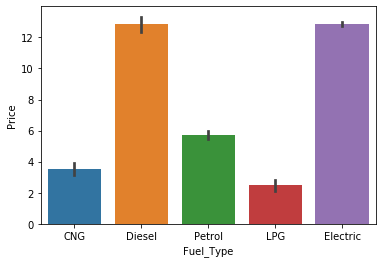

In [25]:
sns.barplot('Fuel_Type','Price',data=train)

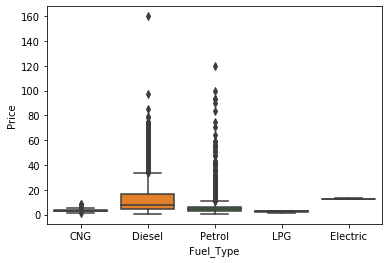

In [26]:
sns.boxplot('Fuel_Type','Price',data=train)

Observations:
1. Almost all cars are either Diesel or Petrol cars with number of Diesel cars slightly leading.
2. Price of Diesel are the highest and LPG cars the cheapest.

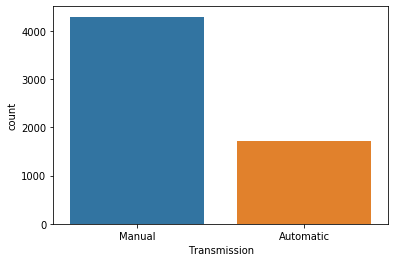

In [27]:
sns.countplot('Transmission',data=train)

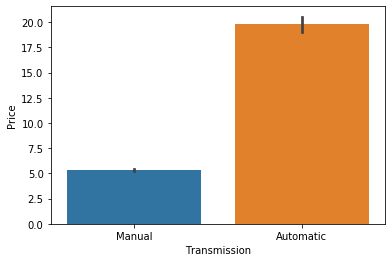

In [28]:
sns.barplot('Transmission','Price',data=train)

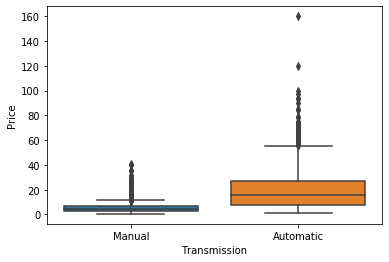

In [29]:
sns.boxplot('Transmission','Price',data=train)

Observations:
1. Manual cars are much larger in number than Automatic cars.
2. Price of Automatic cars are much higher than Manual Cars.

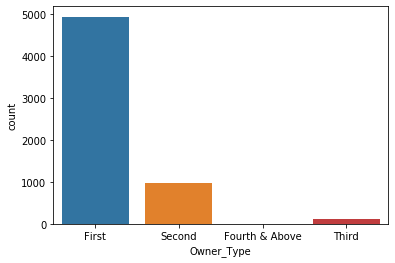

In [30]:
sns.countplot('Owner_Type',data=train)

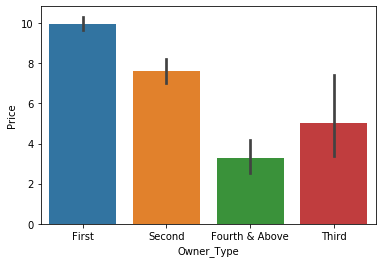

In [31]:
sns.barplot('Owner_Type','Price',data=train)

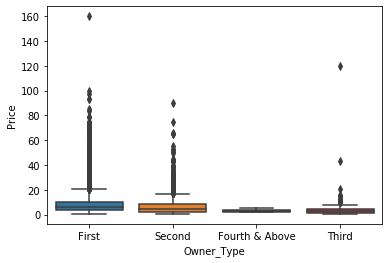

In [32]:
sns.boxplot('Owner_Type','Price',data=train)

Observations:
Most cars are first hand which are also the most expensive.

Now, let's analyse Mileage.

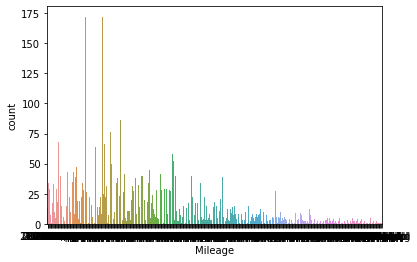

In [33]:
sns.countplot('Mileage',data=train)

In [34]:
train['Mileage']

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 6019, dtype: object

We can't make a definite conclusion from the above plot since Mileage is a numerical features stored as a categorial feature.

In [35]:
t=train['Mileage'].str.split()
mylg=t.str[0]
mylgCount=t.str[1]
mylgCount.value_counts()

kmpl     5951
km/kg      66
Name: Mileage, dtype: int64

In [36]:
train.insert(column='Mileage_Num',value=mylg,loc=8)
train.head()

,Name,Comp_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Num,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [37]:
numF.insert(column='Mileage_Num',value=mylg,loc=3)
numF

,Year,Kilometers_Driven,Seats,Mileage_Num,Price
0,2010,72000,5.0,26.6,1.75
1,2015,41000,5.0,19.67,12.50
2,2011,46000,5.0,18.2,4.50
3,2012,87000,7.0,20.77,6.00
4,2013,40670,5.0,15.2,17.74
...,...,...,...,...,...
6014,2014,27365,5.0,28.4,4.75
6015,2015,100000,5.0,24.4,4.00
6016,2012,55000,8.0,14.0,2.90
6017,2013,46000,5.0,18.9,2.65


Here, we have extracted Mileage_Num from Mileage and stored it as a numerical feature.

We do the same thing with features Engine, Power and New_Price.

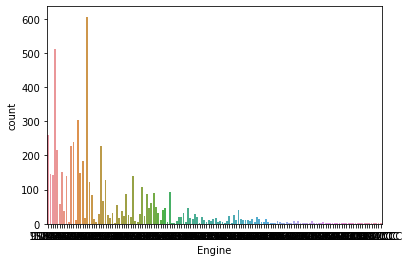

In [38]:
sns.countplot('Engine',data=train)

In [39]:
train['Engine']

0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
6014    1248 CC
6015    1120 CC
6016    2498 CC
6017     998 CC
6018     936 CC
Name: Engine, Length: 6019, dtype: object

In [40]:
t=train['Engine'].str.split()
engNum=t.str[0]
train.insert(column='Engine_Num',value=engNum,loc=10)
numF.insert(column='Engine_Num',value=engNum,loc=4)

In [41]:
train.head()

,Name,Comp_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Num,Mileage,Engine_Num,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,26.6 km/kg,998,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,19.67 kmpl,1582,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,18.2 kmpl,1199,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,20.77 kmpl,1248,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,15.2 kmpl,1968,1968 CC,140.8 bhp,5.0,NaN,17.74


In [42]:
numF.head()

,Year,Kilometers_Driven,Seats,Mileage_Num,Engine_Num,Price
0,2010,72000,5.0,26.6,998,1.75
1,2015,41000,5.0,19.67,1582,12.50
2,2011,46000,5.0,18.2,1199,4.50
3,2012,87000,7.0,20.77,1248,6.00
4,2013,40670,5.0,15.2,1968,17.74


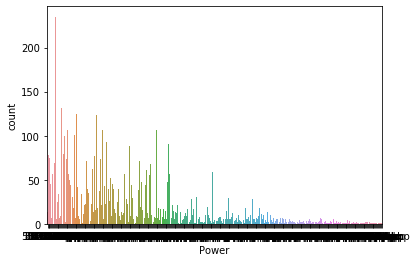

In [43]:
sns.countplot('Power',data=train)

In [44]:
train['Power']

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 6019, dtype: object

In [45]:
t=train['Power'].str.split()
power=t.str[0]
train.insert(column='Power_Num',value=power,loc=12)
numF.insert(column='Power_Num',value=power,loc=5)

In [46]:
train.head()

,Name,Comp_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Num,Mileage,Engine_Num,Engine,Power_Num,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,26.6 km/kg,998,998 CC,58.16,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,19.67 kmpl,1582,1582 CC,126.2,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,18.2 kmpl,1199,1199 CC,88.7,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,20.77 kmpl,1248,1248 CC,88.76,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,15.2 kmpl,1968,1968 CC,140.8,140.8 bhp,5.0,NaN,17.74


In [47]:
numF.head()

,Year,Kilometers_Driven,Seats,Mileage_Num,Engine_Num,Power_Num,Price
0,2010,72000,5.0,26.6,998,58.16,1.75
1,2015,41000,5.0,19.67,1582,126.2,12.50
2,2011,46000,5.0,18.2,1199,88.7,4.50
3,2012,87000,7.0,20.77,1248,88.76,6.00
4,2013,40670,5.0,15.2,1968,140.8,17.74


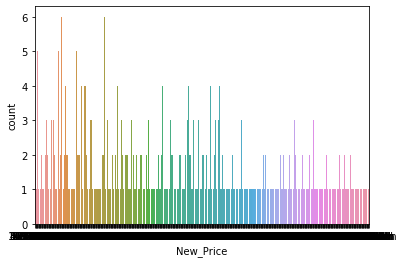

In [48]:
sns.countplot('New_Price',data=train)

In [49]:
train['New_Price']

0             NaN
1             NaN
2       8.61 Lakh
3             NaN
4             NaN
          ...    
6014    7.88 Lakh
6015          NaN
6016          NaN
6017          NaN
6018          NaN
Name: New_Price, Length: 6019, dtype: object

In [50]:
t=train['New_Price'].str.split()
newPrice=t.str[0]
npType=t.str[1]
npType.value_counts()

Lakh    807
Cr       17
Name: New_Price, dtype: int64

Here, New Price is present in two units Lakhs and Crores.
So, after extracting the numerical values, we'll convert the values with crore unit to lakhs by multipying by 100.

In [51]:
for i in range(train.shape[0]):
  if (npType[i]== 'Cr'):
    newPrice[i]=float(newPrice[i])*100

In [52]:
train.insert(column='NewPrice_Num',value=newPrice,loc=15)
numF.insert(column='NewPrice_Num',value=newPrice,loc=6)

In [53]:
catF.drop(['Engine','Mileage','Power','Name'],axis=1)

,Comp_Name,Location,Fuel_Type,Transmission,Owner_Type,New_Price
0,Maruti,Mumbai,CNG,Manual,First,NaN
1,Hyundai,Pune,Diesel,Manual,First,NaN
2,Honda,Chennai,Petrol,Manual,First,8.61 Lakh
3,Maruti,Chennai,Diesel,Manual,First,NaN
4,Audi,Coimbatore,Diesel,Automatic,Second,NaN
...,...,...,...,...,...,...
6014,Maruti,Delhi,Diesel,Manual,First,7.88 Lakh
6015,Hyundai,Jaipur,Diesel,Manual,First,NaN
6016,Mahindra,Jaipur,Diesel,Manual,Second,NaN
6017,Maruti,Kolkata,Petrol,Manual,First,NaN


In [54]:
train.head()

,Name,Comp_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Num,Mileage,Engine_Num,Engine,Power_Num,Power,Seats,NewPrice_Num,New_Price,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,26.6 km/kg,998,998 CC,58.16,58.16 bhp,5.0,NaN,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,19.67 kmpl,1582,1582 CC,126.2,126.2 bhp,5.0,NaN,NaN,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,18.2 kmpl,1199,1199 CC,88.7,88.7 bhp,5.0,8.61,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,20.77 kmpl,1248,1248 CC,88.76,88.76 bhp,7.0,NaN,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,15.2 kmpl,1968,1968 CC,140.8,140.8 bhp,5.0,NaN,NaN,17.74


In [55]:
numF.head()

,Year,Kilometers_Driven,Seats,Mileage_Num,Engine_Num,Power_Num,NewPrice_Num,Price
0,2010,72000,5.0,26.6,998,58.16,NaN,1.75
1,2015,41000,5.0,19.67,1582,126.2,NaN,12.50
2,2011,46000,5.0,18.2,1199,88.7,8.61,4.50
3,2012,87000,7.0,20.77,1248,88.76,NaN,6.00
4,2013,40670,5.0,15.2,1968,140.8,NaN,17.74


In [56]:
#import missingno as msno
#msno.matrix(df=train,figsize=(15,10))

Now, we're going to handle the null values.
First, let's check the number of null values columnwise.

In [57]:
train.isnull().sum()

Name                    0
Comp_Name               0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage_Num             2
Mileage                 2
Engine_Num             36
Engine                 36
Power_Num              36
Power                  36
Seats                  42
NewPrice_Num         5195
New_Price            5195
Price                   0
dtype: int64

Now, we're going to fill the null values by 0.

In [58]:
train=train.fillna(0)
numF=numF.fillna(0)

In [59]:
train.isnull().sum()

Name                 0
Comp_Name            0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage_Num          0
Mileage              0
Engine_Num           0
Engine               0
Power_Num            0
Power                0
Seats                0
NewPrice_Num         0
New_Price            0
Price                0
dtype: int64

The numerical features extracted from the categorical features are still stored as strings, so we'll convert them to float values.

In [62]:
train['Mileage_Num']=train['Mileage_Num'].astype(float)
train['Engine_Num']=train['Engine_Num'].astype(float)
#train['Power_Num']=train['Power_Num'].astype(float)
train['NewPrice_Num']=train['NewPrice_Num'].astype(float)

You can notice that one of the above line is commented.
when we uncomment that line following error is displayed:
ValueError: could not convert string to float: 'null'
So, let's try to fix that.

For that, we'll first see which columns have the 'null' values.
And then, equate them to 0.

In [63]:
train.loc[train['Power_Num']=='null']

,Name,Comp_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Num,Mileage,Engine_Num,Engine,Power_Num,Power,Seats,NewPrice_Num,New_Price,Price
76,Ford Fiesta 1.4 SXi TDCi,Ford,Jaipur,2008,111111,Diesel,Manual,First,17.80,17.8 kmpl,1399.0,1399 CC,null,null bhp,5.0,0.0,0,2.00
79,Hyundai Santro Xing XL,Hyundai,Hyderabad,2005,87591,Petrol,Manual,First,0.00,0.0 kmpl,1086.0,1086 CC,null,null bhp,5.0,0.0,0,1.30
89,Hyundai Santro Xing XO,Hyundai,Hyderabad,2007,73745,Petrol,Manual,First,17.00,17.0 kmpl,1086.0,1086 CC,null,null bhp,5.0,0.0,0,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Hyundai,Mumbai,2005,102000,Petrol,Manual,Second,17.00,17.0 kmpl,1086.0,1086 CC,null,null bhp,5.0,0.0,0,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Hyundai,Kochi,2008,80759,Petrol,Manual,Third,17.00,17.0 kmpl,1086.0,1086 CC,null,null bhp,5.0,0.0,0,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Hyundai,Pune,2006,47200,Petrol,Manual,Second,17.00,17.0 kmpl,1086.0,1086 CC,null,null bhp,5.0,0.0,0,1.20
5893,Maruti Estilo LXI,Maruti,Chennai,2008,51000,Petrol,Manual,Second,19.50,19.5 kmpl,1061.0,1061 CC,null,null bhp,0.0,0.0,0,1.75
5925,Skoda Laura Classic 1.8 TSI,Skoda,Pune,2010,85000,Petrol,Manual,First,17.50,17.5 kmpl,1798.0,1798 CC,null,null bhp,5.0,0.0,0,2.85
5943,Mahindra Jeep MM 540 DP,Mahindra,Chennai,2002,75000,Diesel,Manual,First,0.00,0.0 kmpl,2112.0,2112 CC,null,null bhp,6.0,0.0,0,1.70


In [64]:
numF.loc[numF['Power_Num']=='null']

,Year,Kilometers_Driven,Seats,Mileage_Num,Engine_Num,Power_Num,NewPrice_Num,Price
76,2008,111111,5.0,17.8,1399,null,0,2.00
79,2005,87591,5.0,0.0,1086,null,0,1.30
89,2007,73745,5.0,17.0,1086,null,0,2.10
120,2005,102000,5.0,17.0,1086,null,0,0.85
143,2008,80759,5.0,17.0,1086,null,0,1.67
...,...,...,...,...,...,...,...,...
5873,2006,47200,5.0,17.0,1086,null,0,1.20
5893,2008,51000,0.0,19.5,1061,null,0,1.75
5925,2010,85000,5.0,17.5,1798,null,0,2.85
5943,2002,75000,6.0,0.0,2112,null,0,1.70


In [65]:
train.loc[train['Power_Num']=='null','Power_Num']=0
numF.loc[numF['Power_Num']=='null','Power_Num']=0

In [66]:
train.loc[train['Power_Num']=='null']

,Name,Comp_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Num,Mileage,Engine_Num,Engine,Power_Num,Power,Seats,NewPrice_Num,New_Price,Price


In [67]:
numF.loc[numF['Power_Num']=='null']

,Year,Kilometers_Driven,Seats,Mileage_Num,Engine_Num,Power_Num,NewPrice_Num,Price


In [68]:
train['Power_Num']=train['Power_Num'].astype(float)

And finally, again executing the commented line above.

And just rechecking...

In [69]:
train['Power_Num'].unique()

array([ 58.16 , 126.2  ,  88.7  ,  88.76 , 140.8  ,  55.2  ,  63.1  ,
       171.5  , 103.6  ,  74.   , 103.25 , 116.3  , 187.7  , 115.   ,
       175.56 ,  98.6  ,  83.8  , 167.62 , 190.   ,  88.5  , 177.01 ,
        80.   ,  67.1  , 102.   , 108.45 , 138.1  , 184.   , 179.5  ,
       103.5  ,  64.   ,  82.   , 254.8  ,  73.9  ,  46.3  ,  37.5  ,
        77.   ,  82.9  , 149.92 , 138.03 , 112.2  , 163.7  ,  71.   ,
       105.   , 174.33 ,  75.   , 103.2  ,  53.3  ,  78.9  , 147.6  ,
       147.8  ,  68.   , 186.   , 170.   ,  69.   , 140.   ,  78.   ,
       194.   , 500.   , 108.5  ,  86.8  , 187.74 ,   0.   , 132.   ,
        86.7  ,  73.94 , 117.3  , 218.   , 168.5  ,  89.84 , 110.   ,
        90.   ,  82.85 ,  67.   , 241.4  ,  35.   , 270.9  , 126.32 ,
        73.   , 130.   , 100.6  , 150.   ,  75.94 , 215.   , 107.3  ,
        37.48 , 120.   , 178.   , 152.   ,  91.1  ,  85.8  , 362.07 ,
       121.3  , 143.   ,  81.8  , 171.   ,  76.8  , 103.52 , 444.   ,
       362.9  ,  67.

In [70]:
train.head()

,Name,Comp_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Num,Mileage,Engine_Num,Engine,Power_Num,Power,Seats,NewPrice_Num,New_Price,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,26.6 km/kg,998.0,998 CC,58.16,58.16 bhp,5.0,0.00,0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,19.67 kmpl,1582.0,1582 CC,126.20,126.2 bhp,5.0,0.00,0,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,18.2 kmpl,1199.0,1199 CC,88.70,88.7 bhp,5.0,8.61,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,20.77 kmpl,1248.0,1248 CC,88.76,88.76 bhp,7.0,0.00,0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,15.2 kmpl,1968.0,1968 CC,140.80,140.8 bhp,5.0,0.00,0,17.74


In [71]:
numF.head()

,Year,Kilometers_Driven,Seats,Mileage_Num,Engine_Num,Power_Num,NewPrice_Num,Price
0,2010,72000,5.0,26.6,998,58.16,0,1.75
1,2015,41000,5.0,19.67,1582,126.2,0,12.50
2,2011,46000,5.0,18.2,1199,88.7,8.61,4.50
3,2012,87000,7.0,20.77,1248,88.76,0,6.00
4,2013,40670,5.0,15.2,1968,140.8,0,17.74


### Numerical Data Analysis

Let's check the corelation between various features of the dataset.

In [73]:
train.corr()

,Year,Kilometers_Driven,Mileage_Num,Engine_Num,Power_Num,Seats,NewPrice_Num,Price
Year,1.000000,-0.173048,0.320643,-0.030592,0.084728,0.060698,0.189466,0.305327
Kilometers_Driven,-0.173048,1.000000,-0.064915,0.087549,0.022738,0.068683,-0.051113,-0.011493
Mileage_Num,0.320643,-0.064915,1.000000,-0.549938,-0.419891,-0.209828,-0.030041,-0.306191
Engine_Num,-0.030592,0.087549,-0.549938,1.000000,0.844788,0.429216,0.191659,0.647232
Power_Num,0.084728,0.022738,-0.419891,0.844788,1.000000,0.170102,0.290984,0.751724
Seats,0.060698,0.068683,-0.209828,0.429216,0.170102,1.000000,0.014850,0.057656
NewPrice_Num,0.189466,-0.051113,-0.030041,0.191659,0.290984,0.014850,1.000000,0.425091
Price,0.305327,-0.011493,-0.306191,0.647232,0.751724,0.057656,0.425091,1.000000


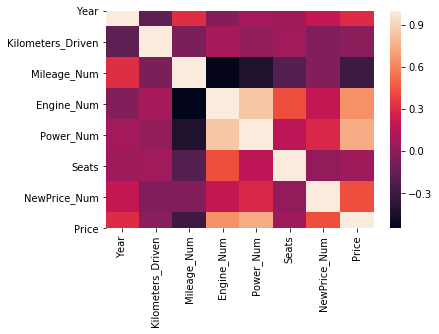

In [74]:
sns.heatmap(train.corr())

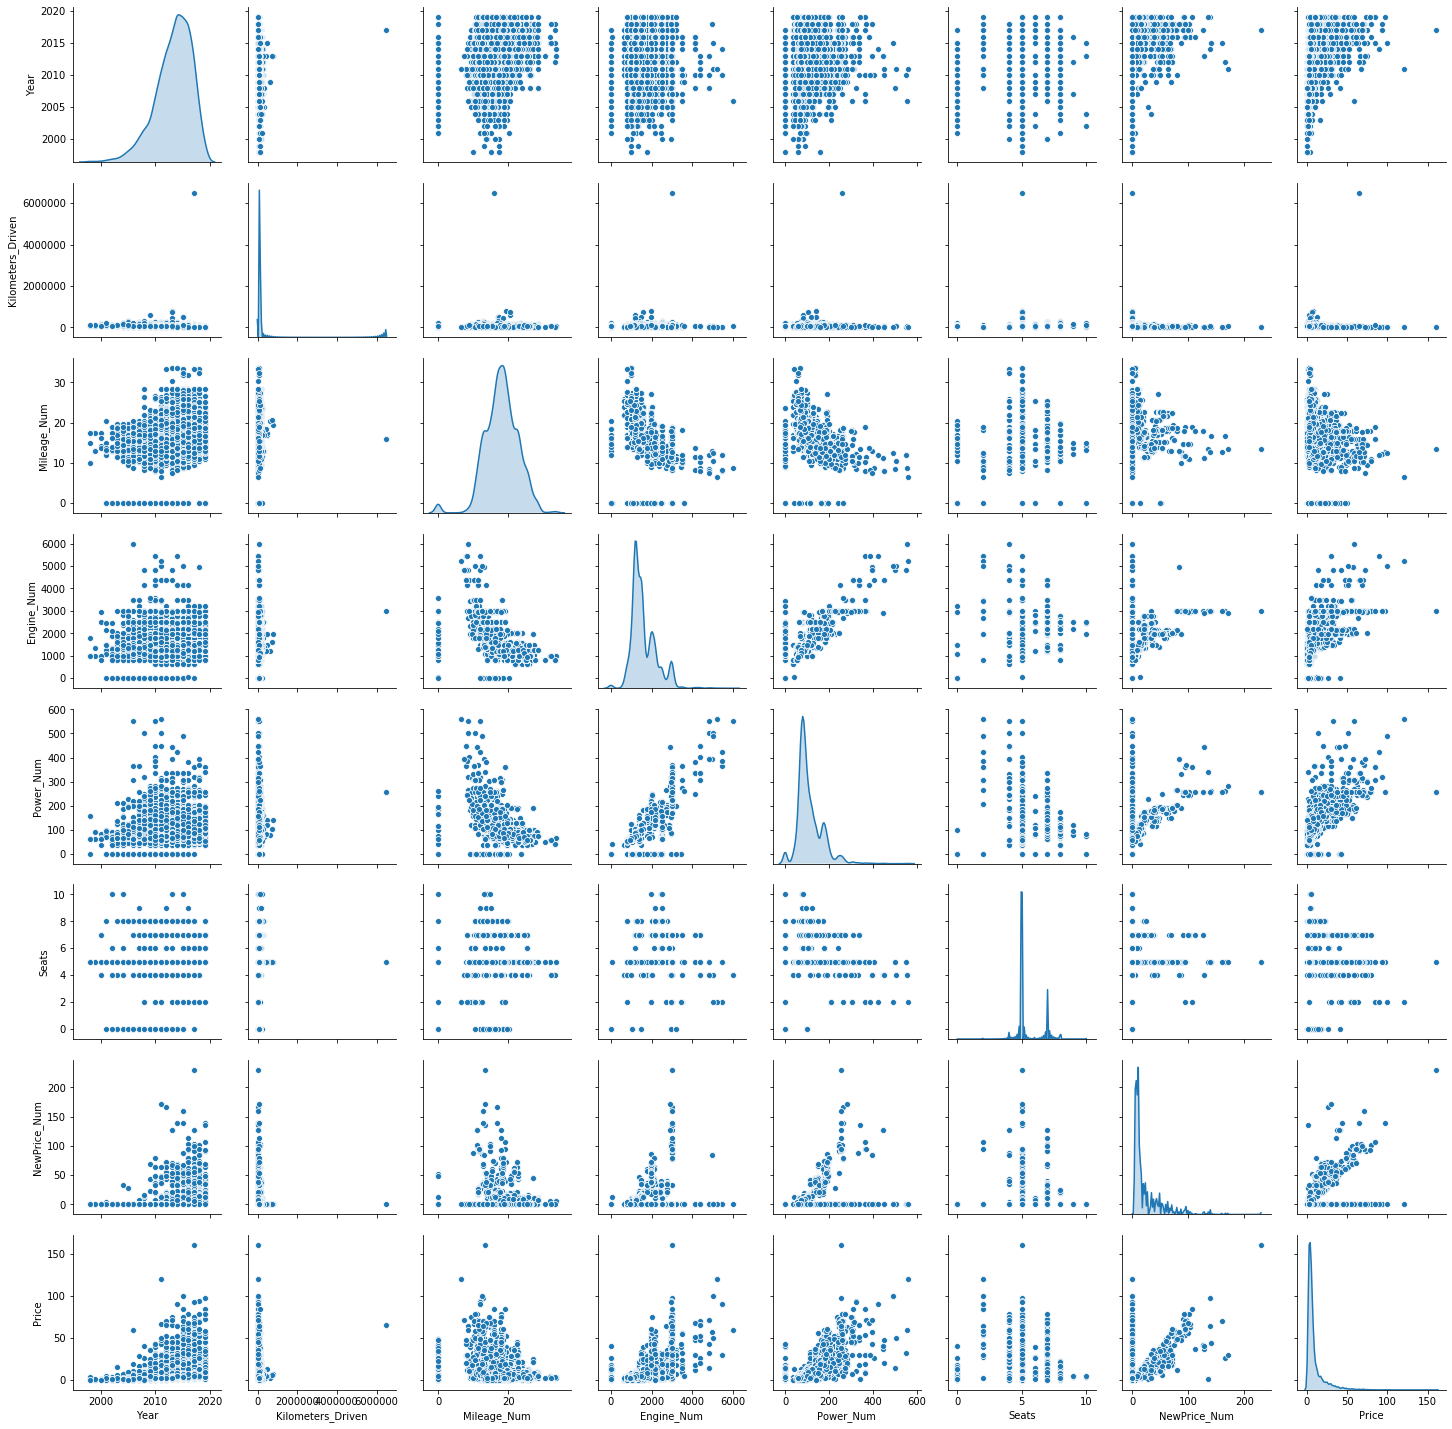

In [79]:
sns.pairplot(train,diag_kind='kde',kind='scatter')

Observations:
1. Year by year, cars are becoming more expensive.
2. More is the power, better is the engine and more expensive is the car.

Now, let's analyse our target feature 'Price' and its relationship with all other numerical features.

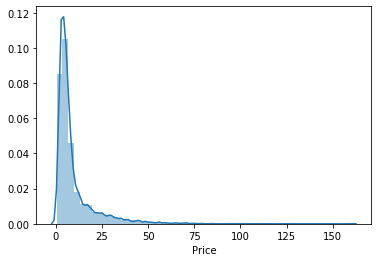

In [80]:
sns.distplot(train['Price'])

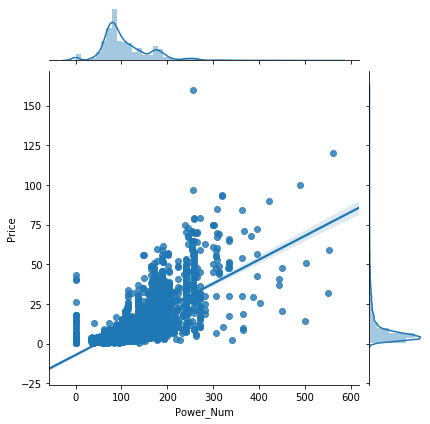

In [81]:
sns.jointplot(x='Power_Num',y='Price',data=train,kind='reg')

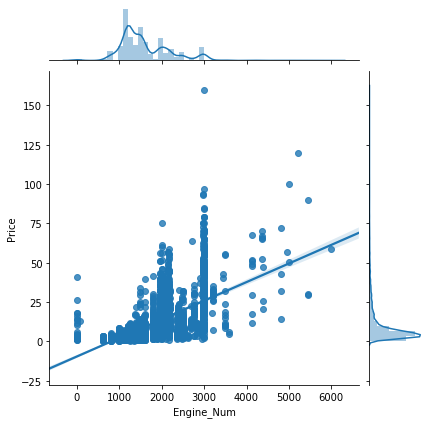

In [82]:
sns.jointplot('Engine_Num','Price',data=train,kind='reg')

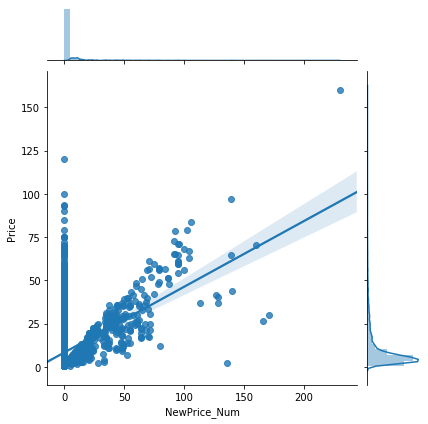

In [84]:
sns.jointplot('NewPrice_Num','Price',data=train,kind='reg')

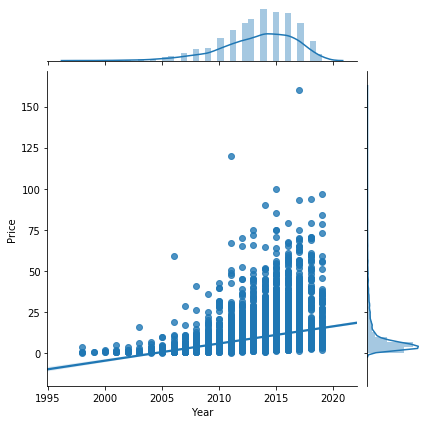

In [85]:
sns.jointplot('Year','Price',data=train,kind='reg')

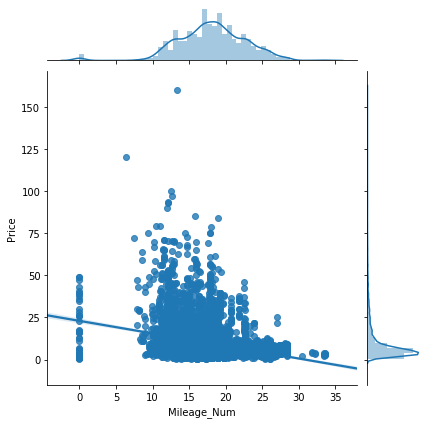

In [86]:
sns.jointplot('Mileage_Num','Price',data=train,kind='reg')

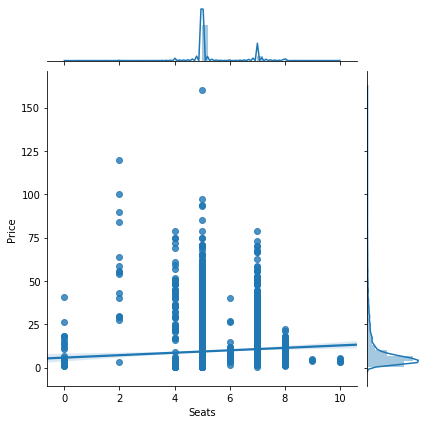

In [87]:
sns.jointplot('Seats','Price',data=train,kind='reg')

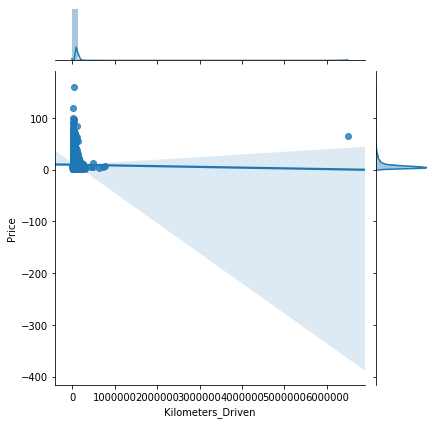

In [88]:
sns.jointplot('Kilometers_Driven','Price',data=train,kind='reg')

Now, let's use dummy encoding and ordinal encoding to prepare our categorical features to be inserted into the linear regression model.

In [75]:
catF.columns

Index(['Name', 'Comp_Name', 'Location', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'New_Price'],
      dtype='object')

In [76]:
catF=catF.drop(['Name','Mileage','Engine','Power','New_Price'],axis=1)
catF.head()

,Comp_Name,Location,Fuel_Type,Transmission,Owner_Type
0,Maruti,Mumbai,CNG,Manual,First
1,Hyundai,Pune,Diesel,Manual,First
2,Honda,Chennai,Petrol,Manual,First
3,Maruti,Chennai,Diesel,Manual,First
4,Audi,Coimbatore,Diesel,Automatic,Second


In [77]:
Nominal_cat=catF.loc[:,['Comp_Name','Location','Fuel_Type']]
Nominal_cat.head()

,Comp_Name,Location,Fuel_Type
0,Maruti,Mumbai,CNG
1,Hyundai,Pune,Diesel
2,Honda,Chennai,Petrol
3,Maruti,Chennai,Diesel
4,Audi,Coimbatore,Diesel


In [78]:
Ordinal_cat=catF.loc[:,['Transmission','Owner_Type']]
Ordinal_cat

,Transmission,Owner_Type
0,Manual,First
1,Manual,First
2,Manual,First
3,Manual,First
4,Automatic,Second
...,...,...
6014,Manual,First
6015,Manual,First
6016,Manual,Second
6017,Manual,First


In [79]:
'''
oe=OrdinalEncoder(categories=[['Manual','Automatic']])
oe.fit_transform([Ordinal_cat['Transmission']])
'''

"\noe=OrdinalEncoder(categories=[['Manual','Automatic']])\noe.fit_transform([Ordinal_cat['Transmission']])\n"

In [80]:
Ordinal_cat['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [81]:
Ordinal_cat['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [82]:
trans_temp={'Manual':1,'Automatic':2}
own_temp={'Fourth & Above':1,'Third':2,'Second':3,'First':4}
Ordinal_cat['Transmission_enc']=Ordinal_cat.Transmission.map(trans_temp)
Ordinal_cat['OwnerType_enc']=Ordinal_cat.Owner_Type.map(own_temp)

In [83]:
Ordinal_cat

,Transmission,Owner_Type,Transmission_enc,OwnerType_enc
0,Manual,First,1,4
1,Manual,First,1,4
2,Manual,First,1,4
3,Manual,First,1,4
4,Automatic,Second,2,3
...,...,...,...,...
6014,Manual,First,1,4
6015,Manual,First,1,4
6016,Manual,Second,1,3
6017,Manual,First,1,4


In [84]:
dm=pd.get_dummies(data=Nominal_cat)
dm

,Comp_Name_Ambassador,Comp_Name_Audi,Comp_Name_BMW,Comp_Name_Bentley,Comp_Name_Chevrolet,Comp_Name_Datsun,Comp_Name_Fiat,Comp_Name_Force One LX,Comp_Name_Ford,Comp_Name_Honda,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6015,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6016,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6017,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


Now, we'll prepare our final x features and y to be plugged into the linear regression model.

In [86]:
y=train['Price']
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6019, dtype: float64

In [87]:
x=pd.concat([dm,Ordinal_cat.loc[:,['Transmission_enc','OwnerType_enc']],numF.drop('Price',axis=1)],axis=1)
x['Mileage_Num'].astype(float)
x['Engine_Num'].astype(float)
x['Power_Num'].astype(float)
x['NewPrice_Num'].astype(float)
x

,Comp_Name_Ambassador,Comp_Name_Audi,Comp_Name_BMW,Comp_Name_Bentley,Comp_Name_Chevrolet,Comp_Name_Datsun,Comp_Name_Fiat,Comp_Name_Force One LX,Comp_Name_Ford,Comp_Name_Honda,...,Fuel_Type_Petrol,Transmission_enc,OwnerType_enc,Year,Kilometers_Driven,Seats,Mileage_Num,Engine_Num,Power_Num,NewPrice_Num
0,0,0,0,0,0,0,0,0,0,0,...,0,1,4,2010,72000,5.0,26.6,998,58.16,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,4,2015,41000,5.0,19.67,1582,126.2,0
2,0,0,0,0,0,0,0,0,0,1,...,1,1,4,2011,46000,5.0,18.2,1199,88.7,8.61
3,0,0,0,0,0,0,0,0,0,0,...,0,1,4,2012,87000,7.0,20.77,1248,88.76,0
4,0,1,0,0,0,0,0,0,0,0,...,0,2,3,2013,40670,5.0,15.2,1968,140.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,0,0,0,0,0,0,0,...,0,1,4,2014,27365,5.0,28.4,1248,74,7.88
6015,0,0,0,0,0,0,0,0,0,0,...,0,1,4,2015,100000,5.0,24.4,1120,71,0
6016,0,0,0,0,0,0,0,0,0,0,...,0,1,3,2012,55000,8.0,14.0,2498,112,0
6017,0,0,0,0,0,0,0,0,0,0,...,1,1,4,2013,46000,5.0,18.9,998,67.1,0


In [88]:
lr=LinearRegression()

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [90]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

After the model has been trained, now let's see how well it preforms.

In [91]:
df=pd.DataFrame({'Actual':y_test,'Predicted':lr.predict(x_test)})
df.head(20)

,Actual,Predicted
5206,8.00,8.884840
4147,6.67,7.691050
2077,1.50,1.057476
362,3.25,4.151526
2853,7.75,8.018300
5003,2.75,-0.279033
4413,3.04,2.577983
2809,1.59,-1.774294
1053,7.20,6.215184
3140,5.27,8.404801


In [105]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr.predict(x_test)))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr.predict(x_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr.predict(x_test))))

Mean Absolute Error: 3.0550606350803693
Mean Squared Error: 48.2573664375852
Root Mean Squared Error: 6.946752222267985
